In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import preprocess
import compress
import search
import score
import index

In [3]:
sns.set_theme()

In [4]:
MIN_TOKENS = 2
DATA_PATH = 'ted_talks.csv'
DATA_COLUMNS = ['description', 'title']  # concatenate these cols together for dataset

In [5]:
df_raw = pd.read_csv(DATA_PATH)
df_raw.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [6]:
text_raw = pd.Series()
for col in DATA_COLUMNS:
    text_raw = pd.concat([text_raw, df_raw[col]], axis=0, ignore_index=True)

df = pd.DataFrame({
    'text_raw': text_raw,
    'text': text_raw.map(preprocess.preprocess_sentence)
})
df

,text_raw,text
0,Sir Ken Robinson makes an entertaining and pro...,sir ken robinson make entertain profoundli mov...
1,With the same humor and humanity he exuded in ...,humor human exud inconveni truth al gore spell...
2,New York Times columnist David Pogue takes aim...,new york time columnist david pogu take aim te...
3,"In an emotionally charged talk, MacArthur-winn...",emot charg talk macarthurwin activist majora c...
4,You've never seen data presented like this. Wi...,never seen data present like drama urgenc spor...
...,...,...
5095,What we're missing in the debate about immigra...,were miss debat immigr
5096,The most Martian place on Earth,martian place earth
5097,What intelligent machines can learn from a sch...,intellig machin learn school fish
5098,A black man goes undercover in the alt-right,black man goe undercov altright


In [7]:
df['tokens'] = df['text'].map(preprocess.tokenize)
df['n_tokens'] = df['tokens'].map(len)
df['n_chars'] = df['text'].str.replace(' ', '').str.len()
df = df[df['n_tokens'] >= MIN_TOKENS]
df.reset_index(drop=True, inplace=True)
df.to_csv('data.csv', index=False)
df

,text_raw,text,tokens,n_tokens,n_chars
0,Sir Ken Robinson makes an entertaining and pro...,sir ken robinson make entertain profoundli mov...,"[sir, ken, robinson, make, entertain, profound...",15,87
1,With the same humor and humanity he exuded in ...,humor human exud inconveni truth al gore spell...,"[humor, human, exud, inconveni, truth, al, gor...",24,119
2,New York Times columnist David Pogue takes aim...,new york time columnist david pogu take aim te...,"[new, york, time, columnist, david, pogu, take...",23,126
3,"In an emotionally charged talk, MacArthur-winn...",emot charg talk macarthurwin activist majora c...,"[emot, charg, talk, macarthurwin, activist, ma...",20,125
4,You've never seen data presented like this. Wi...,never seen data present like drama urgenc spor...,"[never, seen, data, present, like, drama, urge...",17,90
...,...,...,...,...,...
5052,What we're missing in the debate about immigra...,were miss debat immigr,"[were, miss, debat, immigr]",4,19
5053,The most Martian place on Earth,martian place earth,"[martian, place, earth]",3,17
5054,What intelligent machines can learn from a sch...,intellig machin learn school fish,"[intellig, machin, learn, school, fish]",5,29
5055,A black man goes undercover in the alt-right,black man goe undercov altright,"[black, man, goe, undercov, altright]",5,27


<Axes: ylabel='Frequency'>

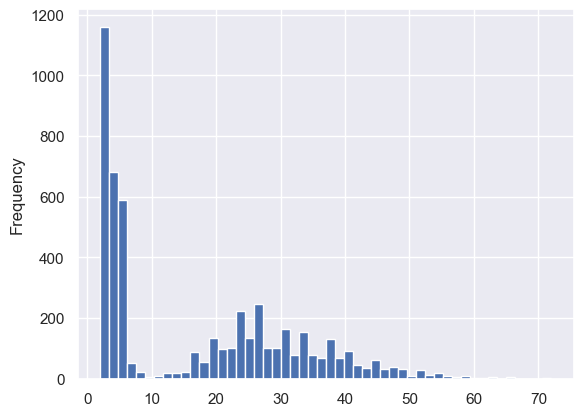

In [8]:
df['n_tokens'].plot.hist(bins=50)

In [9]:
documents = df['tokens'].tolist()

In [10]:
positional = index.PositionalPosting()
positional.add_documents(documents)
positional.dump('positional-posting.json')

In [11]:
non_positional = index.NonPositionalPosting()
non_positional.add_documents(documents)
non_positional.dump('non-positional-posting.json')

In [12]:
positional_graph = index.PositionalGraph()
positional_graph.add_documents(documents)
positional_graph.dump('positional-graph.json')

### Evaluate

#### Index

Indexing is the process of analyzing and record them to be ready for efficient searching. <br>

Two methods of indexing is used. **Posting** and **Graph** <br>
Another paradigm we have is position. **Positional** & **Non Positional** are two positioning system <br>
In postional system, we record the term-id as doc-id is recorded. It means we know in each document, where the term is located. <br>
But the non-positional system just gives us info about what terms are in a doc without delivering their indexes. <br>

In [13]:
term = input('Enter a term: ')
positional.view_term(term)
print()
non_positional.view_term(term)
print()
positional_graph.view_term(term)

PositionalPosting (sir)
Doc-ID  | [Term-IDs]
1       | [0]
55      | [6]
693     | [6]
834     | [3]
1503    | [0]
1803    | [0]


NonPositionalPosting (sir)
Doc-IDs: [1, 55, 693, 834, 1503, 1803]


PositionalGraph (sir)
Doc-ID  | [Term-IDs]
1       | [0]
55      | [6]
693     | [6]
834     | [3]
1503    | [0]
1803    | [0]



#### Compression

In [14]:
get_size = lambda series: sum(map(compress.get_size, series))

indexes = non_positional.get_term(term)
print('Numbers:', indexes)
print()

binarized = list(map(compress.binary, indexes))
gamma_code = list(map(compress.gamma, indexes))
variable_code = list(map(compress.variable_byte, indexes))

print('SeriesName (size in bits): [series]')
print(f'Binary ({get_size(binarized)}):', binarized)
print(f'Gamma Code ({get_size(gamma_code)}):', gamma_code)
print(f'Variable Byte ({get_size(variable_code)}):', variable_code)

Numbers: [1, 55, 693, 834, 1503, 1803]

SeriesName (size in bits): [series]
Binary (49): ['1', '110111', '1010110101', '1101000010', '10111011111', '11100001011']
Gamma Code (92): ['0', '11111010111', '1111111110010110101', '1111111110101000010', '111111111100111011111', '111111111101100001011']
Variable Byte (80): ['10000001', '10110111', '1000010101010110', '1000001001101000', '1000111101011101', '1000101101110000']


#### Search & Score Evaluating

You can also consider quote <"> and wildcard <*> in your query. <br>
Quote: terms inside a quotation must exists exactly the way they are in your query also the same order. <br>
Wildcard: a term starting with a wildcard represents each similiar term can be considered too. <br>
But notice, we can't use them together this moment! <br>

Examples: <br>
- < hello *ok >: as you noticed the term < ok > uses wildcard; such relative terms instead of exactly < ok > that can be considered too are < book > , < took >, < okay >, ...
- < "sir ken" job >: as you can see a phrase is inside of quotations; these phrase must be avialable exactaly this way. < ken sir > is not eligible!

In [15]:
query = input("Enter the query for search (terms separated by space): ").split()
formatted_query = positional.format_query(query)
preprocessed_query = preprocess.preprocess(formatted_query)
final_query = list(positional.validate_terms(preprocessed_query))
flat_query = search.flatten(final_query)

print('The Process Steps of Queries')
print('Query:', query)
print('Formatted:', formatted_query)
print('Preprocessed:', preprocessed_query)
print('Final Query: ', final_query)
print('Flat Query:', flat_query)

The Process Steps of Queries
Query: ['Hello', '"sir', 'ken"', '*move']
Formatted: ['Hello', ['sir', 'ken'], 'move', 'movement', 'movemb']
Preprocessed: ['hello', ['sir', 'ken'], 'move', 'movement', 'movemb']
Final Query:  ['hello', ['sir', 'ken'], 'move', 'movement', 'movemb']
Flat Query: ['hello', 'sir', 'ken', 'move', 'movement', 'movemb']


In [16]:
mx = 10  # the maximum number of results per search
result = positional.search(query)  # dict[doc-id, doc-score]
doc_ids = list(result.keys())[:mx]
scores = list(result.values())[:mx]
docs = list(map(positional.fetch_document, doc_ids))
n = len(str(max(doc_ids))) + 1
print('Search Result')
print(f"ID{' '*(n-2)}:  Score {' '*7}  # Document")
for _id, _doc, _score in zip(doc_ids, docs, scores):
    print(format(_id, f'<{n-1}'), ': ', format(_score, '.10f'), '  #', ' '.join(_doc))

Search Result
ID   :  Score          # Document
1    :  0.2936470807   # sir ken robinson make entertain profoundli move case creat educ system nurtur rather undermin creativ
693  :  0.2111867517   # poignant funni followup fabl 2006 talk sir ken robinson make case radic shift standard school person learn creat condit kid natur talent flourish
1503 :  0.1965031028   # sir ken robinson outlin 3 principl crucial human mind flourish current educ cultur work funni stir talk tell us get educ death valley face nurtur youngest gener climat possibl
834  :  0.1923857778   # talk rsa anim sir ken robinson lay link 3 troubl trend rise dropout rate school dwindl stake art adhd import time talk parent teacher


In [17]:
ap = positional.average_precision(docs, flat_query, minimum=0, maximum=1)
print('The AP value of above query and documents:', ap)

The AP value of above query and documents: 0.22343068


In [18]:
idx = 0
doc_id = doc_ids[idx]
doc = docs[idx]
print('Doc-ID:', doc_id)
print('Document:', doc)
print('Query:', flat_query)

Doc-ID: 1
Document: ['sir', 'ken', 'robinson', 'make', 'entertain', 'profoundli', 'move', 'case', 'creat', 'educ', 'system', 'nurtur', 'rather', 'undermin', 'creativ']
Query: ['hello', 'sir', 'ken', 'move', 'movement', 'movemb']


In [19]:
matrix = positional.steps_matrix(doc, flat_query)
print('Score (sum of prods): ', matrix['prod'].sum())
matrix

Score (sum of prods):  0.2936470822741594


Query                                          Document             \
              tf tf-wt   df       idf        wt        nz       tf tf-wt   df   
terms                                                                           
sir            1   1.0    6  2.925742  2.925742  0.408713        1   1.0    6   
ken            1   1.0    7  2.858795  2.858795  0.399360        1   1.0    7   
robinson       0   0.0    7  2.858795  0.000000  0.000000        1   1.0    7   
make           0   0.0  469  1.032720  0.000000  0.000000        1   1.0  469   
entertain      0   0.0   22  2.361470  0.000000  0.000000        1   1.0   22   
profoundli     0   0.0    4  3.101833  0.000000  0.000000        1   1.0    4   
move           1   1.0  115  1.643195  1.643195  0.229547        1   1.0  115   
case           0   0.0  102  1.695293  0.000000  0.000000        1   1.0  102   
creat          0   0.0  206  1.390026  0.000000  0.000000        1   1.0  206   
educ           0   0.0   77  1.817402  0.000000  0.000000        1   1.0   77   
system         0   0.0  103  1.691056  0.000000  0.000000        1   1.0  103   
nurtur         0   0.0    5  3.004923  0.000000  0.000000        1   1.0    5   
rather         0   0.0   30  2.226772  0.000000  0.000000        1   1.0   30   
undermin       0   0.0    1  3.703893  0.000000  0.000000        1   1.0    1   
creativ        0   0.0   99  1.708258  0.000000  0.000000        1   1.0   99   
hello          1   1.0    1  3.703893  3.703893  0.517417        0   0.0    1   
movement       1   1.0   41  2.091109  2.091109  0.292118        0   0.0   41   
movemb         1   1.0    1  3.703893  3.703893  0.517417        0   0.0    1   

                                              prod  
                 idf        wt        nz            
terms                                               
sir         2.925742  2.925742  0.316479  0.129349  
ken         2.858795  2.858795  0.309237  0.123497  
robinson    2.858795  2.858795  0.309237  0.000000  
make        1.032720  1.032720  0.111710  0.000000  
entertain   2.361470  2.361470  0.255442  0.000000  
profoundli  3.101833  3.101833  0.335527  0.000000  
move        1.643195  1.643195  0.177745  0.040801  
case        1.695293  1.695293  0.183381  0.000000  
creat       1.390026  1.390026  0.150360  0.000000  
educ        1.817402  1.817402  0.196589  0.000000  
system      1.691056  1.691056  0.182922  0.000000  
nurtur      3.004923  3.004923  0.325044  0.000000  
rather      2.226772  2.226772  0.240871  0.000000  
undermin    3.703893  3.703893  0.400652  0.000000  
creativ     1.708258  1.708258  0.184783  0.000000  
hello       3.703893  0.000000  0.000000  0.000000  
movement    2.091109  0.000000  0.000000  0.000000  
movemb      3.703893  0.000000  0.000000  0.000000